# DHTEMP

Down hole temperature

Note: MatLab scripts (.mat), Wintemp files (.wtf) and Encapsulated PostScript files (.eps) should be opened in other software. 

In [1]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from iodp import utils, dhtemp



In [3]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

Current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties\notebooks
New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


## Read DHTEMP .eps

In [4]:
# Skipping this. Use Adobe products or another image viewer

## Read DHTEMP .png file

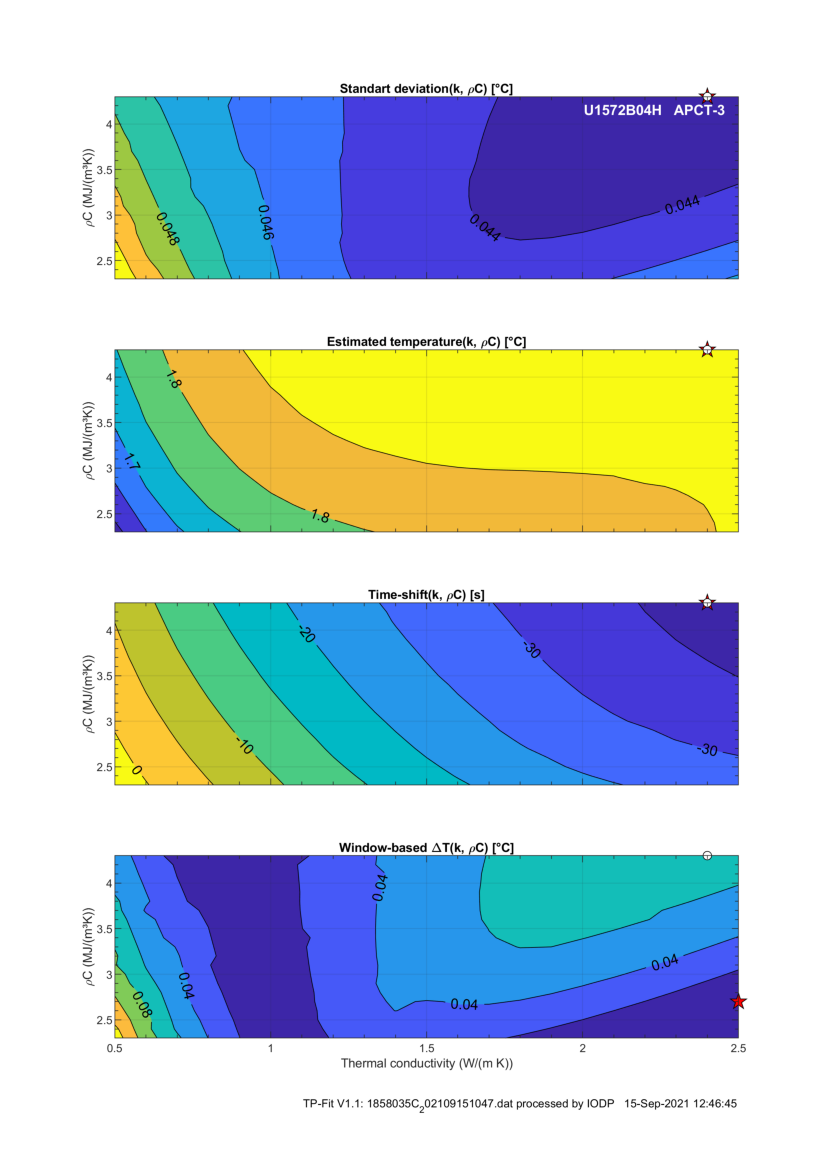

In [5]:
file = "./data/input/DHTEMP/1858035C_202109151047_Contours.png"

img = Image.open(file)
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img)
plt.axis('off')
plt.show()

## Read DHTEMP .dat files

In [6]:
file = './data/input/DHTEMP/1858035C_202109151047.dat'
df = dhtemp.read_dhtemp_dat_file(file, profile_only=False)
df


,loggeridentifier,comment,pc_time,logger_time,startbatteryvoltage,endbatteryvoltage,totalsamplecount,resistanceoffset,resistancescale,temperatureoffset,...,temperaturecubic,yyyy,mm,dd,HH,MM,SS,Raw,Res[Ohm],Temp[degC]
0,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,10,47,01,24866,35460.891,21.288
1,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,10,47,02,24867,35462.232,21.288
2,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,10,47,03,24866,35460.891,21.288
3,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,10,47,04,24866,35460.891,21.288
4,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,10,47,05,24866,35460.891,21.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,12,40,46,29977,42704.323,17.119
6826,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,12,40,47,29979,42707.320,17.118
6827,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,12,40,48,29980,42708.819,17.117
6828,1858035C,,"15 September 2021 , 12:40:58","15 September 2021 , 12:40:58",2970 mV,2902 mV,456793,11905.14456,90939.70156,0.0009057505,...,0.0000001097,2021,09,15,12,40,49,29981,42710.317,17.116


## Read DHTEMP .txt file

The DHTEMP .txt files contain 2 different timeseries profiles. You must specify which one to return. The file headers may or may not be included.

In [17]:
file = "./data/input/DHTEMP/1858035C_202109151047_Report.txt"
df = dhtemp.read_dhtemp_txt(file, time_shift=False, profile_only=True)
print("The Results vs time-shift profile:")
print(df.head())
print()

print("The Data and model profile:")
df = dhtemp.read_dhtemp_txt(file, time_shift=True, profile_only=True)
print(df.head())
print()

print("The Data and model profile with the file headers:")
df = dhtemp.read_dhtemp_txt(file, time_shift=True, profile_only=False)
df.head()

The Results vs time-shift profile:
  Time (s) T_Data (°C) T_Model (°C)
0  -4520.0     21.2880          NaN
1  -4519.0     21.2880          NaN
2  -4518.0     21.2880          NaN
3  -4517.0     21.2880          NaN
4  -4516.0     21.2880          NaN

The Data and model profile:
  Time-shift (s) Mean misfit (°C) Temperature (°C)
0        -50.000            0.046            1.776
1        -47.500            0.045            1.795
2        -45.000            0.045            1.815
3        -42.500            0.044            1.835
4        -40.000            0.044            1.855

The Data and model profile with the file headers:


,version,comment,estimated_formation_temperature_(degc),mean_misfit_(degc),k_(w/(m_k)),rc_(mj/(m^3k)),t-sft_(s),model_type,t0_(s),window_start_(s),...,sediment_thermal_conductivity_(w/(m_k)),sediment_heat_capacity_(j/(m^3_k)),tool_type,data_format,estimated_temperature_error_(degc),data_quality_description,data_quality_number,Time-shift (s),Mean misfit (°C),Temperature (°C)
0,TP-Fit Version 1.1,1858035C_202109151047.dat processed by IODP (1...,1.88,0.043,2.40,4.30,-36.914,APCT_T,4520,9,...,1,3.4e6,APCT-3,ANTARES,1,None,1,-50.000,0.046,1.776
1,TP-Fit Version 1.1,1858035C_202109151047.dat processed by IODP (1...,1.88,0.043,2.40,4.30,-36.914,APCT_T,4520,9,...,1,3.4e6,APCT-3,ANTARES,1,None,1,-47.500,0.045,1.795
2,TP-Fit Version 1.1,1858035C_202109151047.dat processed by IODP (1...,1.88,0.043,2.40,4.30,-36.914,APCT_T,4520,9,...,1,3.4e6,APCT-3,ANTARES,1,None,1,-45.000,0.045,1.815
3,TP-Fit Version 1.1,1858035C_202109151047.dat processed by IODP (1...,1.88,0.043,2.40,4.30,-36.914,APCT_T,4520,9,...,1,3.4e6,APCT-3,ANTARES,1,None,1,-42.500,0.044,1.835
4,TP-Fit Version 1.1,1858035C_202109151047.dat processed by IODP (1...,1.88,0.043,2.40,4.30,-36.914,APCT_T,4520,9,...,1,3.4e6,APCT-3,ANTARES,1,None,1,-40.000,0.044,1.855


# Exploring DHTEMP

In [27]:
file = "./data/input/DHTEMP/1858035C_202109151047_Report.txt"
df = dhtemp.read_dhtemp_txt(file, time_shift=False, profile_only=True)
df

,Time (s),T_Data (°C),T_Model (°C)
0,-4520.0,21.2880,NaN
1,-4519.0,21.2880,NaN
2,-4518.0,21.2880,NaN
3,-4517.0,21.2880,NaN
4,-4516.0,21.2880,NaN
...,...,...,...
6825,2305.0,17.1190,2.3009
6826,2306.0,17.1180,2.3008
6827,2307.0,17.1170,2.3006
6828,2308.0,17.1160,2.3005


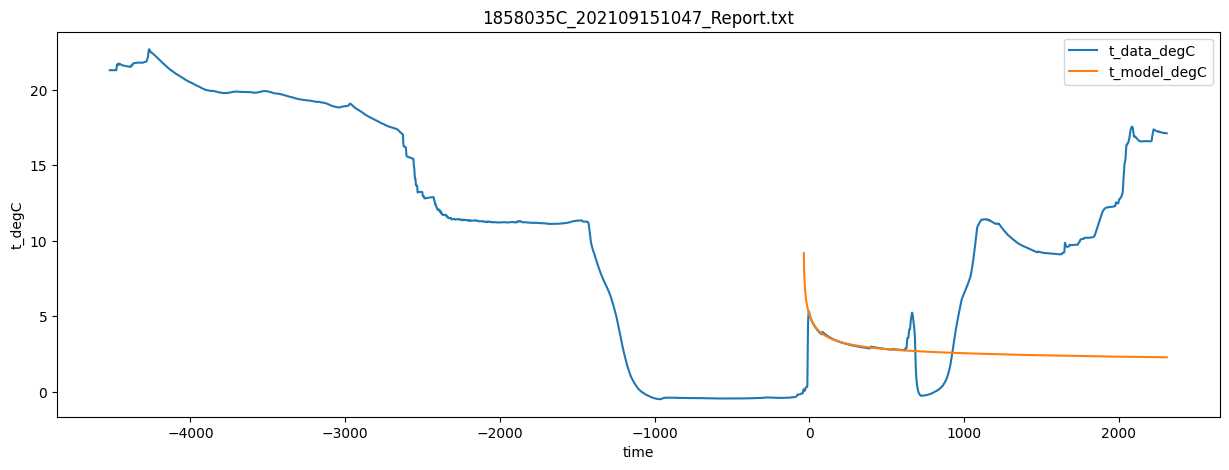

In [28]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(
    df['Time (s)'].astype(float),
    df['T_Data (°C)'].astype(float),
    label="t_data_degC"
)
ax.plot(
    df['Time (s)'].astype(float),
    df['T_Model (°C)'].astype(float),
    label="t_model_degC"
)

ax.set_ylabel('t_degC')
ax.set_xlabel('time')
ax.set_title(f"{os.path.split(file)[-1]}")
ax.legend()
plt.show()

In [29]:
file = "./data/input/DHTEMP/1858035C_202109151047_Report.txt"
df = dhtemp.read_dhtemp_txt(file, time_shift=True, profile_only=True)
df

,Time-shift (s),Mean misfit (°C),Temperature (°C)
0,-50.000,0.046,1.776
1,-47.500,0.045,1.795
2,-45.000,0.045,1.815
3,-42.500,0.044,1.835
4,-40.000,0.044,1.855
5,-37.500,0.044,1.875
6,-36.914,0.044,1.880
7,-35.000,0.044,1.896
8,-32.500,0.044,1.917
9,-30.000,0.045,1.938


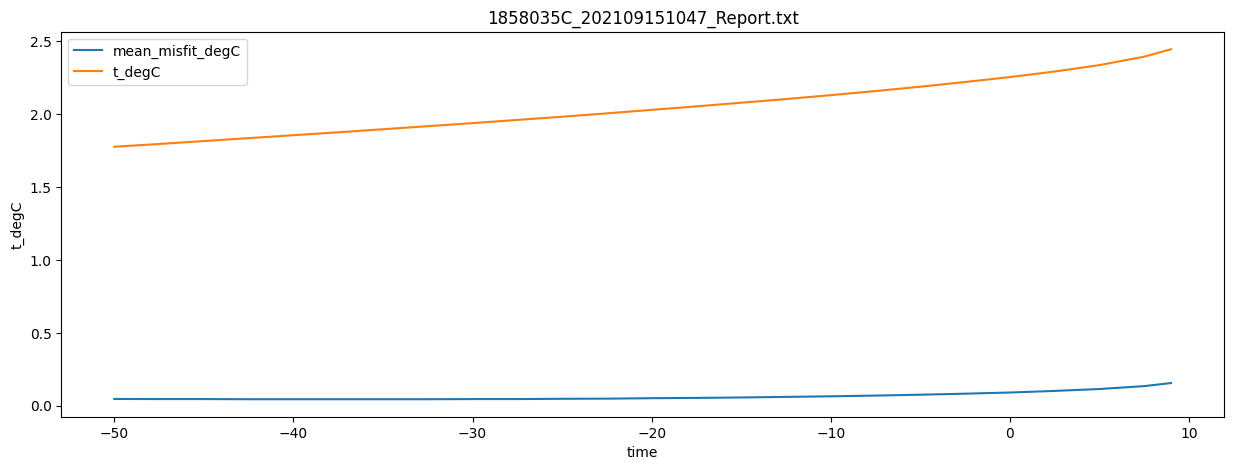

In [30]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(
    df['Time-shift (s)'].astype(float),
    df['Mean misfit (°C)'].astype(float),
    label="mean_misfit_degC"
)
ax.plot(
    df['Time-shift (s)'].astype(float),
    df['Temperature (°C)'].astype(float),
    label="t_degC"
)

ax.set_ylabel('t_degC')
ax.set_xlabel('time')
ax.set_title(f"{os.path.split(file)[-1]}")
ax.legend()
plt.show()